## Make these plots more deployable for a presentation

In [2]:
import os
notebook_wd = os.getcwd()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

os.chdir(os.path.join(notebook_wd, '..'))
from src.d00_utils.conf_utils import *

In [5]:
compounds, water = load_compounds()
exp_vial_droplet = load_experiments(['bd_as_vial', 'bd_as_droplet'])
constants = load_constants()
paths = load_paths()
exp_vial_droplet

{'bd_as_vial': {'raw_data_file': '190918-butenedial-ammonium-sulfate-droplets.csv',
  'composition': {'Butenedial': '0.75*0.07',
   'PEG-6': 0.2,
   'NH42SO4': '0.03*3'},
  'solution_name': None,
  'bad_idx': 100,
  'idx_range': None,
  'trap_time': [0, 10],
  'other_query': 'comptype=="bd07hg20as03" and trapped<10 and p283>30000',
  'y_col': 'mz84_mz283',
  'p283_cutoff': 30000,
  'columns_to_keep': ['trapped',
   'comp',
   'experiment',
   'vial',
   'mz84_mz283',
   'mz85_mz283']},
 'bd_as_droplet': {'raw_data_file': '190918-butenedial-ammonium-sulfate-droplets.csv',
  'composition': {'Butenedial': '0.75*0.07',
   'PEG-6': 0.2,
   'NH42SO4': '0.03*3'},
  'solution_comp': 'bd07hg20as03',
  'bad_idx': 100,
  'idx_range': None,
  'trap_time': None,
  'other_query': 'vial<10 and comptype=="bd07hg20as03"',
  'y_col': 'mz84_mz283',
  'p283_cutoff': 30000,
  'columns_to_keep': ['trapped',
   'comp',
   'experiment',
   'vial',
   'mz84_mz283',
   'mz85_mz283']}}

In [4]:
from src.d01_data.clean_ms_data import *
from src.d01_data.process_ms_data import *

In [5]:
df_cleaned = filter_and_clean_data(ms_file_name=paths['raw_data'], experiment_parameters=exp_vial_droplet, save_cleaned_data=True)
df_cleaned.head()

,mins,solution_name,experiment,vial,mz84_mz283,mz85_mz283
8,3.0,bd07hg20as03_002,bd_as_vial,1072.0,0.040180,0.033534
9,3.0,bd07hg20as03_002,bd_as_vial,1082.0,0.035870,0.044183
14,4.0,bd07hg20as03_006,bd_as_vial,1000.0,0.021963,0.016611
17,7.0,bd07hg20as03_007,bd_as_vial,61.0,0.002801,0.015251
19,4.0,bd07hg20as03_008,bd_as_vial,145.0,0.004552,0.011642


In [6]:
df_cleaned

,mins,solution_name,experiment,vial,mz84_mz283,mz85_mz283
8,3.0,bd07hg20as03_002,bd_as_vial,1072.0,0.040180,0.033534
9,3.0,bd07hg20as03_002,bd_as_vial,1082.0,0.035870,0.044183
14,4.0,bd07hg20as03_006,bd_as_vial,1000.0,0.021963,0.016611
17,7.0,bd07hg20as03_007,bd_as_vial,61.0,0.002801,0.015251
19,4.0,bd07hg20as03_008,bd_as_vial,145.0,0.004552,0.011642
21,5.0,bd07hg20as03_009,bd_as_vial,128.0,0.004641,0.010195
22,3.0,bd07hg20as03_007,bd_as_vial,373.0,0.017507,0.025091
25,4.0,bd07hg20as03_010,bd_as_vial,2.0,0.001183,0.036631
27,3.0,bd07hg20as03_011,bd_as_vial,64.0,0.004270,0.041863
60,7.0,bd07hg20as03_019,bd_as_vial,1178.0,0.028062,0.050537


In [7]:
df_processed = process_ms_data_in_droplet_vs_vial_experiments(paths['cleaned_data'], save_processed_data=True)
df_processed.head()

,solution_name,experiment,mz84_mz283,mz85_mz283,hrs
0,bd07hg20as03_002,bd_as_vial,0.040180,0.033534,17.916667
1,bd07hg20as03_002,bd_as_vial,0.035870,0.044183,18.083333
2,bd07hg20as03_006,bd_as_vial,0.021963,0.016611,16.733333
3,bd07hg20as03_007,bd_as_vial,0.002801,0.015251,1.133333
4,bd07hg20as03_008,bd_as_vial,0.004552,0.011642,2.483333


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

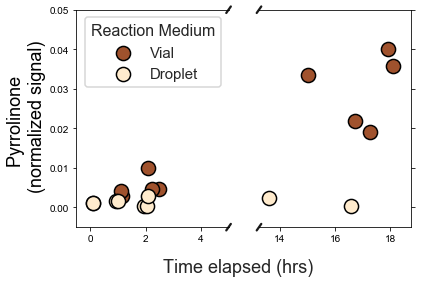

In [9]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True)
sns.set(style="ticks")  # sets sns as the rule
sns.set_context("talk")
# sns.set_palette("Spectral")

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.tick_right()

# diagonal lines to show interruption
d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax.scatter('hrs', 'mz84_mz283', data=df_processed[df_processed.experiment=='bd_as_vial'], label='Vial', s=200,
          alpha=1, edgecolors= "black", color='sienna')
ax.scatter('hrs', 'mz84_mz283', data=df_processed[df_processed.experiment=='bd_as_droplet'], label='Droplet', s=200,
          alpha=1, edgecolors= "black", color='blanchedalmond')
ax2.scatter('hrs', 'mz84_mz283', data=df_processed[df_processed.experiment=='bd_as_vial'], label='Vial', s=200,
          alpha=1, edgecolors= "black", color='sienna')
ax2.scatter('hrs', 'mz84_mz283', data=df_processed[df_processed.experiment=='bd_as_droplet'], label='Droplet', s=200,
          alpha=1, edgecolors= "black", color='blanchedalmond')

f.text(0.5, -0.03, 'Time elapsed (hrs)', ha='center', size=18)
ax.set_ylabel('Pyrrolinone \n (normalized signal)', size=18)
ax.set_xlim(-0.5,5)
ax2.set_xlim(13.25,18.75)
ax.set_ylim(-0.005, 0.05)
ax.legend(title='Reaction Medium', fontsize='small')
plt.setp(ax.get_legend().get_title(), fontsize='16');

In [6]:
# created a new plotting function
from src.d00_utils.data_utils import import_ms_data

df_processed = import_ms_data(paths['processed_data'])

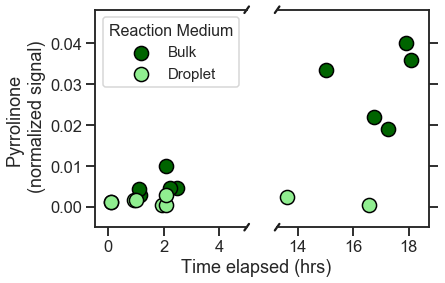

In [7]:
from src.d05_reporting.plot_ms_data import plot_ms_data_with_break
plot_ms_data_with_break(df=df_processed, experiment_names=['bd_as_vial', 'bd_as_droplet'], 
                        t_col_name='hrs', y_col_name='mz84_mz283', left_xlims=[-0.5, 5], right_xlims=[13.25, 18.75],
                        analyte_name='Pyrrolinone',
                        point_colors=['darkgreen','lightgreen'], series_labels=['Bulk','Droplet'], legend_title='Reaction Medium')

In [11]:
exp_droplet_nh3g = load_experiments(['bd_nh3g'])
exp_droplet_nh3g

{'bd_nh3g': {'raw_data_file': '190924-butenedial-nh3g-droplets.csv',
  'composition': {'Butenedial': 0.75, 'PEG-6': 0.2},
  'solution_name': ['butenedial-peg6-181016', 'butenedial-peg6-181018'],
  'bad_idx': None,
  'idx_range': None,
  'trap_time': None,
  'other_query': 'p283>=10000 and (solution=="butenedial-peg6-181016" or solution=="butenedial-peg6-181018")',
  'y_col': 'mz84_mz283',
  'p283_cutoff': 30000,
  'columns_to_keep': ['trapped',
   'solution',
   'nominal_nh3_mM',
   'mz84_mz283',
   'mz85_mz283',
   'mz149_mz283']}}